In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from variable import *
t = np.array(range(1850,2020))
def rhs(y, t,kappa_l,Do,gamma_l,gamma_o,c_amp,alpha,beta_l,beta_o,lamb,rho,rho2,beta_od,kappa_o): 
    emis_t = lambda x:x
    T_a,C_a,C_o,C_od,T_o = y
    eq1 = 1/kappa_l*(6.3*np.log(C_a/cina)-lamb*T_a-Do*(T_a-T_o))
    eq2 = (emis_t(t)-(gamma_l+gamma_o)*eq1*(1+T_a*c_amp))/(1+alpha*(beta_l))-beta_o*(alpha*C_a-rho*C_o)
    diffusion_to_ocean = (alpha*C_a - rho*C_o)
    diffusion_to_deepocean = (rho*C_o - rho2*C_od)
    eq3 = beta_o * diffusion_to_ocean + gamma_o*(1+T_a*c_amp)*eq1 - beta_od*diffusion_to_deepocean
    eq4 = beta_od * diffusion_to_deepocean
    eq5 = 1/kappa_o*Do*(T_a - T_o)
    return np.array([eq1,eq2,eq3,eq4,eq5])

In [14]:
mat=1.8e20 #moles in atm
rho_a=1e6/mat/12*1e15 #conversion factor from Pg to ppm

lamb=3.8/4.8 #Climate sensitivity(Wm-2K-1)


kappa_l=9.3  #Land surface heat capacity Ka-1(Wm-2)-1
kappa_o=12.6 # Ocean surface heat capacity Ka-1(Wm-2)-1

Do=0.21 # heat diffusion coefficient from atm to ocean
# I change this from kdeep to Do, the table is wrong



c_amp=1.1 #carbon feedback amplification factor

beta_l=3.5 #Bioshpere carbon fertilization parameter (Pgppm-1)
beta_o=2.4 #Ocean carbon diffusion parameter(Pgppm-1)
beta_od=.5 #Deep shallow ocean carbon diffusion coefficient(Pgppm-1)


gamma_l=-0.13 #Biosphere temperature response(PgK-1)
gamma_o=-0.2 #Ocean carbon solubility response(PgK-1)



aco2c = 290  # atmospheric co2 concentration in ppm
cina = aco2c/alpha  # carbon in atm ; ppm -> Pg

oco2c = aco2c  # the ocean is in balance with atm
cino = 600
rho_o=oco2c/cino  # 

odco2c = 290 # the deep ocean is in balance with atm 
cinod = aco2c
rho_od= odco2c/cinod

In [15]:
y0 = [0,cina,0,cino,cinod]# the inital values of T_a, C_a, C_o, C_od, T_o

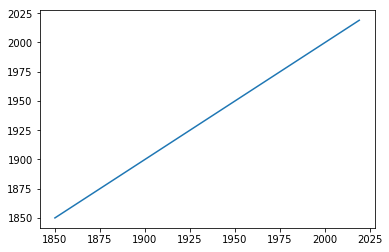

In [16]:
plt.plot(range(1850,2020),range(1850,2020))

In [17]:
y = odeint(rhs,y0,t,args = (kappa_l,Do,gamma_l,gamma_o,c_amp,rho_a,beta_l,beta_o,lamb,rho_o,rho_od,beta_od,kappa_o))

Text(0, 0.5, 'Temperature')

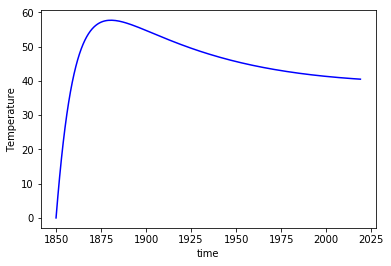

In [18]:
plt.plot(t, y[:, 0], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Temperature')

Text(0, 0.5, 'Carbon')

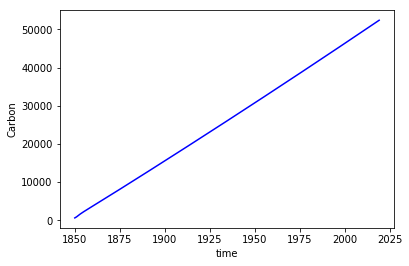

In [19]:
plt.plot(t, y[:, 1], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon')

Text(0, 0.5, 'Carbon of ocean')

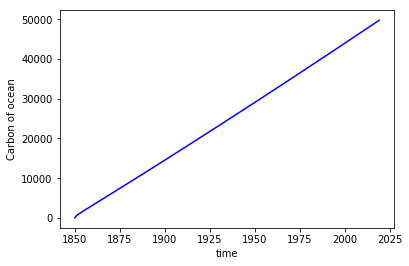

In [20]:
plt.plot(t, y[:, 2], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon of ocean')

Text(0, 0.5, 'Carbon of deep ocean')

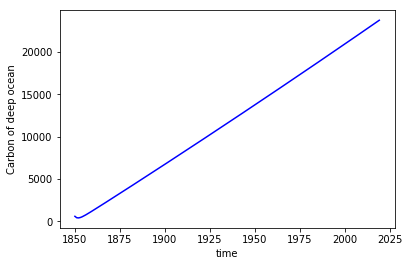

In [21]:
plt.plot(t, y[:, 3], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon of deep ocean')

Text(0, 0.5, 'Temperature')

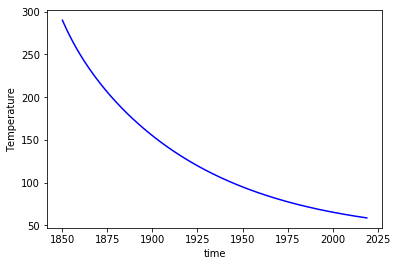

In [22]:
plt.plot(t, y[:, 4], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Temperature')